<a href="https://colab.research.google.com/github/AnshAhirwar/Machine-Learning/blob/main/Prac%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

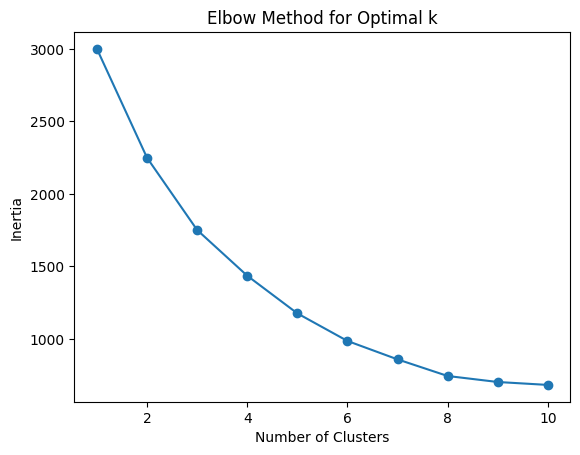

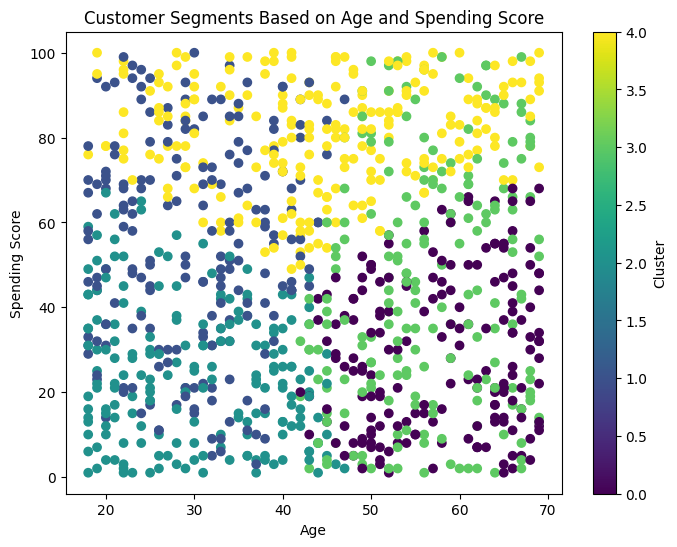

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Simulate a dataset for this example
# Generate a large synthetic dataset with 1000 customers
np.random.seed(42)

# Number of samples
n_samples = 1000

# Random 'Age' between 18 and 70
age = np.random.randint(18, 70, size=n_samples)

# Random 'Annual Income' between $30,000 and $120,000
annual_income = np.random.randint(30000, 120000, size=n_samples)

# Random 'Spending Score' between 1 and 100
spending_score = np.random.randint(1, 101, size=n_samples)

# Create the dataset as a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Annual Income': annual_income,
    'Spending Score': spending_score
})

# Step 1: Preprocessing the Data
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Scale the features using StandardScaler (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Step 2: Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means Clustering with the optimal number of clusters
# From the Elbow method, assume the optimal k is 5 (just an example).
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

# Step 4: Add the cluster labels to the original data
data_imputed['Cluster'] = y_kmeans

# Step 5: Visualize the Clusters on a 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(data_imputed['Age'], data_imputed['Spending Score'], c=data_imputed['Cluster'], cmap='viridis')
plt.title('Customer Segments Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.show()

# Optional: You can also visualize using Annual Income vs Spending Score or other pairs of features.
